[[ 1.          0.02        0.          0.        ]
 [ 0.          1.         -0.01800165  0.        ]
 [ 0.          0.          1.          0.02      ]
 [ 0.          0.          0.41688634  1.        ]] [[ 0.        ]
 [ 0.04387699]
 [ 0.        ]
 [-0.08547465]]
[[34.35661658 24.71339086 89.5450231  18.7847591 ]]
double c[] = {34.356617, 24.713391, 89.545023, 18.784759};


/Users/vladimirberman/opt/anaconda3/lib/python3.9/site-packages/scipy/linalg/_solvers.py:683: RuntimeWarning: invalid value encountered in reciprocal
  elwisescale = sca[:, None] * np.reciprocal(sca)


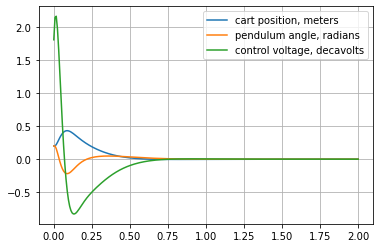

In [3]:
#!/usr/bin/python

import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

def dlqr(A,B,Q,R):
    """
    Solve the discrete time lqr controller.
    x[k+1] = A x[k] + B u[k]
    cost = sum x[k].T*Q*x[k] + u[k].T*R*u[k]
    """
    # first, solve the ricatti equation
    P = np.matrix(scipy.linalg.solve_discrete_are(A, B, Q, R))
    # compute the LQR gain
    K = np.matrix(scipy.linalg.inv(B.T*P*B+R)*(B.T*P*A))
    return -K

l = .22 # rod length is 2l
m = (2*l)*(.006**2)*(3.14/4)*7856 # rod 6 mm diameter, 44cm length, 7856 kg/m^3
M = .4
dt = .02 # 20 ms
g = 9.8

A = np.matrix([[1, dt, 0, 0],[0,1, -(3*m*g*dt)/(7*M+4*m),0],[0,0,1,dt],[0,0,(3*g*(m+M)*dt)/(l*(7*M+4*m)),1]])
B = np.matrix([[0],[7*dt/(7*M+4*m)],[0],[-3*dt/(l*(7*M+4*m))]])


print (A,B)

Q = np.matrix("1 0 0 0; 0 .0001 0 0 ; 0 0 1 0; 0 0 0 .0001")
R = np.matrix(".0005")


K = dlqr(A,B,Q,R)
print (K)
print ("double c[] = {%f, %f, %f, %f};" % (K[0,0], K[0,1], K[0,2], K[0,3])
)
nsteps = 250
time = np.linspace(0, 2, nsteps, endpoint=True)
xk = np.matrix(".2 ; 0 ; .2 ; 0")

X = []
T = []
U = []

for t in time:
    uk = K*xk
    X.append(xk[0,0])
    T.append(xk[2,0])
    v = xk[1,0]
    force = uk[0,0]
    accel = force/(M+m)
    u = ((1-.404)*v + dt*accel)/.055/10
    U.append(u)
    xk = A*xk + B*uk

plt.plot(time, X, label="cart position, meters")
plt.plot(time, T, label='pendulum angle, radians')
plt.plot(time, U, label='control voltage, decavolts')

plt.legend(loc='upper right')
plt.grid()
plt.show()

In [4]:
K

matrix([[34.35661658, 24.71339086, 89.5450231 , 18.7847591 ]])

matrix([[1.e+00, 0.e+00, 0.e+00, 0.e+00],
        [0.e+00, 1.e-04, 0.e+00, 0.e+00],
        [0.e+00, 0.e+00, 1.e+00, 0.e+00],
        [0.e+00, 0.e+00, 0.e+00, 1.e-04]])